In [2]:
import math
import numpy as np
from scipy.stats import beta
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

# BAYESIAN PRIORS AND WORKING WITH PROBABILITY DISTRIBUTION

C-3PO's data: 

- 2 people survived and 7440 people exploded (alpha likelihood, beta likelihood)

Our believe in Han Solo being badass: 

- Han Solo will survive with probability of 20 000 : 1 (alpha prior, beta_prior)

In [2]:
alpha_l = 2      # alpha likelihood
beta_l = 7400    # beta likelihood
alpha_p = 20000  # alpha prior
beta_p = 1      # alpha prior

num_of_trials = 1000   # number of times we will simulate an event

Let's plot C-3PO's data first

d:\Miniconda\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

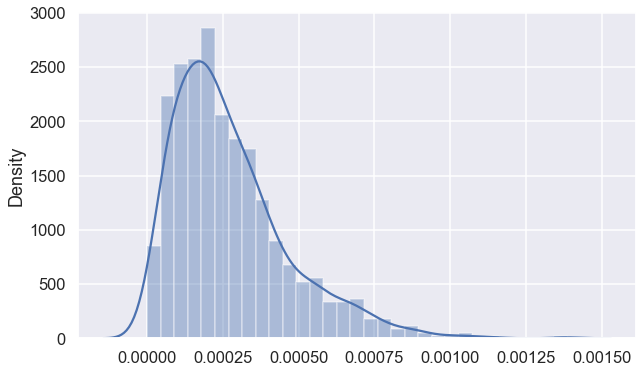

In [8]:
fig, ax = plt.subplots(figsize = (10, 6))

r = beta.rvs(alpha_l, beta_l, loc = 0, scale = 1, size = num_of_trials)
sns.distplot(r,
             ax=ax)

Now our believes about Han Solo

d:\Miniconda\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

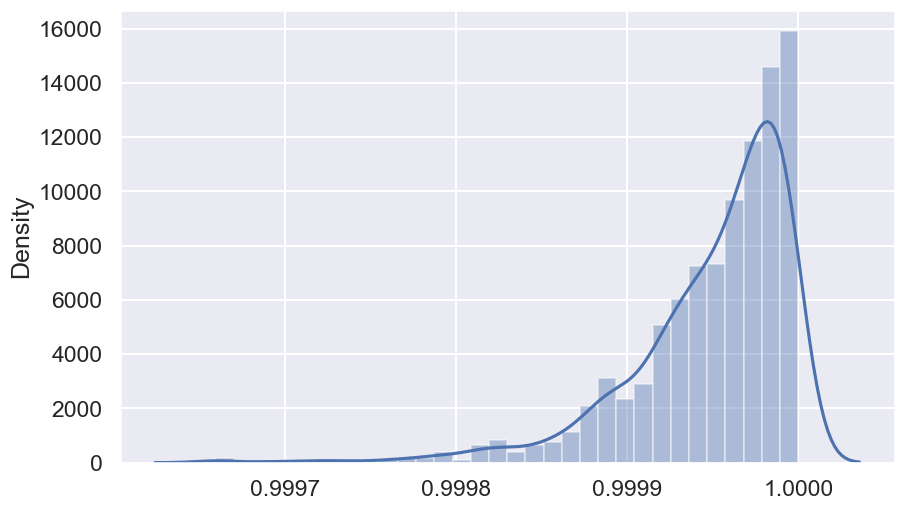

In [10]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)

r2 = beta.rvs(alpha_p, beta_p, loc=0, scale=1, size=num_of_trials)
sns.distplot(r2, 
             ax=ax)

Finally the plot which combines our likelihood with prior

d:\Miniconda\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

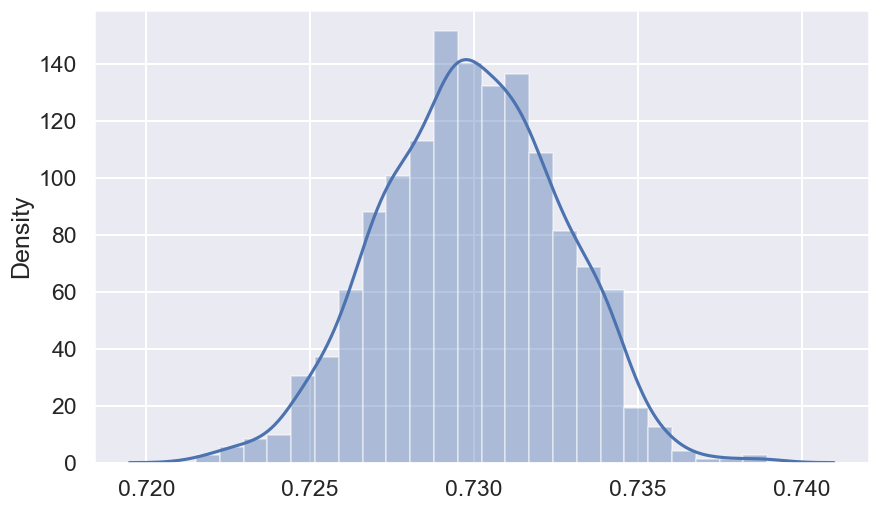

In [11]:
alpha_c = alpha_l + alpha_p
beta_c = beta_l + beta_p
r3 = beta.rvs(alpha_c, beta_c, loc=0, scale=1, size=num_of_trials)

fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.distplot(r3, 
             ax=ax)

### Q1. A friend find a coin on the ground, flips it, and gets six heads in a row and then one tails. Give the beta distribution that describes this. Use integration to determine the probability that the true rate of flipping heads is between 0.4 and 0.6, reflecting that the coin is reasonably fair.

In [3]:
p = [0.40, 0.60]
a = 6
b = 1

beta.sf(x=p, a=a, b=b)[0] - beta.sf(x=p, a=a, b=b)[1]

0.04256000000000004

### Q2. Come up with a prior probability that the coin is fair. Use a beta distribution such that there is at least a 95 percent chance that the true rate of flipping heads is between 0.4 and 0.6.

In [7]:
a2 = 55
b2 = 55

a_com = a + a2
b_com = b + b2

beta.sf(x=p, a=a_com, b=b_com)[0] - beta.sf(x=p, a=a_com, b=b_com)[1]

0.9527469094270733

### Q3. Now see how many more heads (with no more tails) it would take to convince you that there is reasonable chance that the coin is not fair. In this case, let's say that this means that our belief in the rate of the coing being between 0.4 and 0.6 drops below 0.5.

In [12]:
p = [0.40, 0.60]
a = 6 + 23
b = 1

a2 = 55
b2 = 55

a_com = a + a2
b_com = b + b2

beta.sf(x=p, a=a_com, b=b_com)[0] - beta.sf(x=p, a=a_com, b=b_com)[1]

0.4954058980753958